http://statmodeling.hatenablog.com/entry/pystan-rstanbook-chap5-1  
model12-2  
\begin{equation}
State : \mu [t] \sim Normal(\mu[t-1],\sigma_\mu)  \\
Observe : Y[t] \sim Normal(\mu[t],\sigma_Y)
\end{equation}


In [1]:
import pystan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import pickle
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
stan_code = """
data {
    int T;
    int T_pred;
    vector[T] Y;
}

parameters{
    vector[T] mu;
    real<lower=0> s_mu;
    real<lower=0> s_Y;
}

model{
    mu[2:T] ~ normal(mu[1:(T-1)], s_mu);
    Y ~ normal(mu, s_Y);
}

generated quantities{
    vector[T+T_pred] mu_all;
    vector[T_pred] y_pred;
    mu_all[1:T] = mu;
    for (t in 1:T_pred){
        mu_all[T+t] = normal_rng(mu_all[T+t-1], s_mu);
        y_pred[t] = normal_rng(mu_all[T+t], s_Y);
    }
}
"""

In [3]:
data = pd.read_csv("data-ss1.txt")

In [4]:
data = data["Y"]

In [5]:
data

0     11.2
1     11.0
2     11.3
3     10.8
4     10.8
5     11.3
6     11.1
7     11.0
8     11.4
9     11.7
10    12.5
11    12.6
12    12.8
13    13.0
14    13.0
15    13.6
16    13.3
17    12.6
18    13.1
19    12.6
20    12.1
Name: Y, dtype: float64

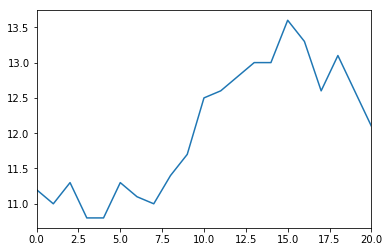

In [6]:
data.plot()

In [7]:
d = {"Y":list(data.values), "T":data.shape[0], "T_pred":3}

{'T': 21,
 'T_pred': 3,
 'Y': [11.199999999999999,
  11.0,
  11.300000000000001,
  10.800000000000001,
  10.800000000000001,
  11.300000000000001,
  11.1,
  11.0,
  11.4,
  11.699999999999999,
  12.5,
  12.6,
  12.800000000000001,
  13.0,
  13.0,
  13.6,
  13.300000000000001,
  12.6,
  13.1,
  12.6,
  12.1]}

In [8]:
sm = pystan.StanModel(model_code=stan_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f58034fc739f7074ee30f196c12c3f49 NOW.


KeyboardInterrupt: 

In [25]:
fit = sm.sampling(data=d, iter=1000, chains=4)

In [26]:
la = fit.extract(permuted=True)
mu = la["mu"]
a = fit.extract(permuted=False)

/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  after removing the cwd from sys.path.


In [27]:
mu

array([[ 11.35194269,  11.33155541,  11.25895217, ...,  12.87669782,
         12.57767973,  12.16626841],
       [ 11.16065411,  11.11080696,  11.36021338, ...,  13.16082093,
         12.76575558,  12.12403734],
       [ 11.20329551,  10.94001985,  11.31370752, ...,  13.11106267,
         12.60728596,  12.04632682],
       ..., 
       [ 11.12407663,  10.91971284,  11.33725487, ...,  13.03100924,
         12.43781056,  11.99834446],
       [ 11.36746154,  10.93834373,  11.1896486 , ...,  12.90407188,
         12.70337976,  12.16409174],
       [ 11.04531388,  11.01224424,  11.19561819, ...,  13.02822211,
         12.70752378,  12.17638627]])

In [28]:
print(fit)

Inference for Stan model: anon_model_f58034fc739f7074ee30f196c12c3f49.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]       11.18  3.3e-3   0.15  10.86  11.11  11.19  11.25   11.5   2000    1.0
mu[1]       11.05  3.1e-3   0.14  10.78  10.97  11.03  11.11  11.36   2000    1.0
mu[2]       11.22  5.1e-3   0.14  10.88  11.15  11.25  11.31  11.48    791    1.0
mu[3]       10.86  3.4e-3   0.15  10.58  10.78  10.84  10.93   11.2   2000   1.01
mu[4]       10.86  4.9e-3   0.15   10.6  10.78  10.84  10.93  11.21    963   1.01
mu[5]       11.23  3.3e-3   0.15  10.88  11.16  11.26  11.32   11.5   2000    1.0
mu[6]       11.12  3.1e-3   0.14  10.85  11.04  11.11  11.19  11.43   2000    1.0
mu[7]       11.07  6.3e-3   0.15  10.81  10.98  11.04  11.15  11.44    591   1.01
mu[8]       11.42  3.2e-3   0.14  11.15  11.34  11.41  11.48  11.74   2000 

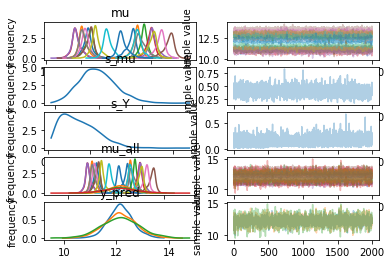

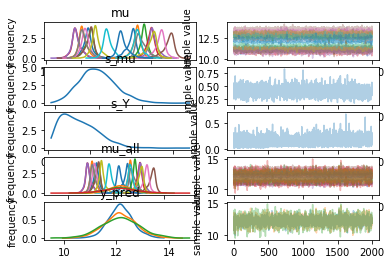

In [29]:
fit.plot()

In [30]:
with open("output/model_and_result.pkl", "wb") as f:
    pickle.dump(sm, f)
    pickle.dump(fit, f)

/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import pickle
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

In [10]:
with open('output/model_and_result.pkl', 'rb') as f:
    stanmodel = pickle.load(f)
    fit_nuts = pickle.load(f)

## summary
with open('output/fit-summary.txt', 'w') as f:
    f.write(str(fit_nuts))

In [17]:
fit_nuts

Inference for Stan model: anon_model_f58034fc739f7074ee30f196c12c3f49.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]       11.18  3.3e-3   0.15  10.86  11.11  11.19  11.25   11.5   2000    1.0
mu[1]       11.05  3.1e-3   0.14  10.78  10.97  11.03  11.11  11.36   2000    1.0
mu[2]       11.22  5.1e-3   0.14  10.88  11.15  11.25  11.31  11.48    791    1.0
mu[3]       10.86  3.4e-3   0.15  10.58  10.78  10.84  10.93   11.2   2000   1.01
mu[4]       10.86  4.9e-3   0.15   10.6  10.78  10.84  10.93  11.21    963   1.01
mu[5]       11.23  3.3e-3   0.15  10.88  11.16  11.26  11.32   11.5   2000    1.0
mu[6]       11.12  3.1e-3   0.14  10.85  11.04  11.11  11.19  11.43   2000    1.0
mu[7]       11.07  6.3e-3   0.15  10.81  10.98  11.04  11.15  11.44    591   1.01
mu[8]       11.42  3.2e-3   0.14  11.15  11.34  11.41  11.48  11.74   2000 

In [12]:
palette = sns.color_palette()
ms = fit_nuts.extract(permuted=False, inc_warmup=True)
iter_from = fit_nuts.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_nuts.sim['fnames_oi']
num_pages = math.ceil(len(paraname)/4)

/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  


In [13]:
ms = fit_nuts.extract(permuted=True, inc_warmup=True)
print(ms["mu"].shape)


/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  """Entry point for launching an IPython kernel.


(2000, 21)


In [14]:
ms = fit_nuts.extract(permuted=False, inc_warmup=True)
print(ms.shape)
ms

/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  """Entry point for launching an IPython kernel.


(1000, 4, 51)


array([[[ -2.11585414e-01,   1.83583265e+00,  -4.54877315e-01, ...,
           6.22683149e+00,   1.17304866e+00,  -1.01419932e+02],
        [  1.60010679e+00,   1.71900507e+00,  -1.24373289e+00, ...,
          -4.11339939e+00,  -2.00485654e+00,  -1.36941468e+03],
        [  4.84596685e-01,   9.64458739e-01,  -1.06308044e+00, ...,
           1.56512962e+00,   3.73147368e+00,  -2.87256427e+03],
        [ -1.80089016e+00,   7.13527828e-01,   1.85244984e-01, ...,
          -1.32297160e+01,  -1.83621888e+01,  -3.02251302e+03]],

       [[ -2.11585414e-01,   1.83583265e+00,  -4.54877315e-01, ...,
           4.97040608e+00,  -6.21504065e+00,  -1.01419932e+02],
        [  1.60010679e+00,   1.71900507e+00,  -1.24373289e+00, ...,
          -1.35248688e+00,  -1.72592347e+00,  -1.36941468e+03],
        [  4.84596685e-01,   9.64458739e-01,  -1.06308044e+00, ...,
           1.13737393e+00,   7.65966692e-01,  -2.87256427e+03],
        [ -1.80089016e+00,   7.13527828e-01,   1.85244984e-01, ...,
      

In [15]:

with PdfPages('output/fit-traceplot.pdf') as pdf:
    for pg in range(num_pages):
        plt.figure()
        for pos in range(4):
            pi = pg*4 + pos
            if pi >= len(paraname): break
            plt.subplot(4, 2, 2*pos+1)
            plt.tight_layout()
            [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
            plt.title(paraname[pi])
            plt.subplot(4, 2, 2*(pos+1))
            plt.tight_layout()
            [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
            plt.title(paraname[pi])
        pdf.savefig()
        plt.close()


In [18]:
la = fit_nuts.extract()
la

OrderedDict([('mu',
              array([[ 11.35194269,  11.33155541,  11.25895217, ...,  12.87669782,
                       12.57767973,  12.16626841],
                     [ 11.16065411,  11.11080696,  11.36021338, ...,  13.16082093,
                       12.76575558,  12.12403734],
                     [ 11.20329551,  10.94001985,  11.31370752, ...,  13.11106267,
                       12.60728596,  12.04632682],
                     ..., 
                     [ 11.12407663,  10.91971284,  11.33725487, ...,  13.03100924,
                       12.43781056,  11.99834446],
                     [ 11.36746154,  10.93834373,  11.1896486 , ...,  12.90407188,
                       12.70337976,  12.16409174],
                     [ 11.04531388,  11.01224424,  11.19561819, ...,  13.02822211,
                       12.70752378,  12.17638627]])),
             ('s_mu',
              array([ 0.26490459,  0.36133226,  0.53231198, ...,  0.40686473,
                      0.44303606,  0.32665099]

In [19]:

mu = la["mu"]
print(mu.shape)
mu_qua = np.percentile(mu,q=[2.5,25,50,75,97.5],axis=0)
print(mu_qua.shape)
mu_qua

(2000, 21)
(5, 21)


array([[ 10.86379529,  10.78602221,  10.87996387,  10.58306193,
         10.59779605,  10.88282731,  10.85050921,  10.81575935,
         11.14744792,  11.50464983,  12.05154904,  12.2723614 ,
         12.50202269,  12.68770509,  12.76147852,  13.01143231,
         12.90512108,  12.46781906,  12.62147767,  12.29982585,
         11.91140033],
       [ 11.10529429,  10.96957641,  11.14981714,  10.77878266,
         10.77722807,  11.16393388,  11.04299141,  10.9772723 ,
         11.34418632,  11.67136669,  12.34111772,  12.51892255,
         12.72607218,  12.9097626 ,  12.9681771 ,  13.40347627,
         13.18010464,  12.6046446 ,  12.92577213,  12.52653136,
         12.08261527],
       [ 11.18599665,  11.02883256,  11.25036688,  10.84104376,
         10.83717805,  11.25895146,  11.11008973,  11.04366704,
         11.40509544,  11.7363419 ,  12.45252303,  12.59488492,
         12.79250997,  12.99172705,  13.02891287,  13.52250514,
         13.27012373,  12.6853324 ,  13.03434283,  12.5978

In [20]:
pred = la["y_pred"]
print(pred.shape)
pred_qua = np.percentile(pred,q=[2.5,25,50,75,97.5],axis=0)
print(pred_qua.shape)
pred_qua


(2000, 3)
(5, 3)


array([[ 11.25121003,  10.92811436,  10.71147831],
       [ 11.87201524,  11.75259462,  11.67803805],
       [ 12.16540189,  12.14702876,  12.1674905 ],
       [ 12.47024691,  12.56958692,  12.64723044],
       [ 13.15953159,  13.4114749 ,  13.69700539]])

In [21]:
plots = np.concatenate((mu_qua,pred_qua),axis=1)
print(plots.shape)
plots

(5, 24)


array([[ 10.86379529,  10.78602221,  10.87996387,  10.58306193,
         10.59779605,  10.88282731,  10.85050921,  10.81575935,
         11.14744792,  11.50464983,  12.05154904,  12.2723614 ,
         12.50202269,  12.68770509,  12.76147852,  13.01143231,
         12.90512108,  12.46781906,  12.62147767,  12.29982585,
         11.91140033,  11.25121003,  10.92811436,  10.71147831],
       [ 11.10529429,  10.96957641,  11.14981714,  10.77878266,
         10.77722807,  11.16393388,  11.04299141,  10.9772723 ,
         11.34418632,  11.67136669,  12.34111772,  12.51892255,
         12.72607218,  12.9097626 ,  12.9681771 ,  13.40347627,
         13.18010464,  12.6046446 ,  12.92577213,  12.52653136,
         12.08261527,  11.87201524,  11.75259462,  11.67803805],
       [ 11.18599665,  11.02883256,  11.25036688,  10.84104376,
         10.83717805,  11.25895146,  11.11008973,  11.04366704,
         11.40509544,  11.7363419 ,  12.45252303,  12.59488492,
         12.79250997,  12.99172705,  1

In [22]:
T = np.arange(21)
T_all = np.arange(24)

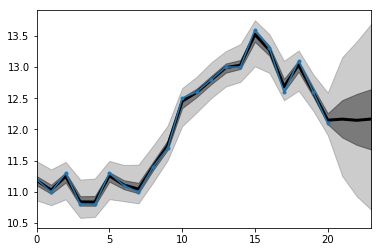

In [26]:
fig, ax = plt.subplots(1,1)
ax.plot(T_all,plots[2,:],color="black",linewidth=3)
ax.fill_between(T_all,plots[1,:],plots[3,:],color="black", alpha=0.4)
ax.fill_between(T_all,plots[0,:],plots[4,:],color="black",alpha=0.2)
data.plot(marker=".")


model 12-3
\begin{equation}
State : \mu [t] \sim Normal(2\mu[t-1] - \mu[t-2], \sigma_\mu)  \\
Observe : Y[t] \sim Normal(\mu[t],\sigma_Y)
\end{equation}


In [30]:
stan_code = """
data {
    int T;
    int T_pred;
    vector[T] Y;
}

parameters{
    vector[T] mu;
    real<lower=0> s_mu;
    real<lower=0> s_Y;
}

model{
    mu[3:T] ~ normal(2 * mu[2:(T-1)]-mu[1:T-2], s_mu);
    Y ~ normal(mu, s_Y);
}

generated quantities{
    vector[T+T_pred] mu_all;
    vector[T_pred] y_pred;
    mu_all[1:T] = mu;
    for (t in 1:T_pred){
        mu_all[T+t] = normal_rng(2*mu_all[T+t-1] - mu_all[T+t-2], s_mu);
        y_pred[t] = normal_rng(mu_all[T+t], s_Y);
    }
}
"""

In [31]:
d = {"Y":list(data.values), "T":data.shape[0], "T_pred":3}
sm = pystan.StanModel(model_code=stan_code)
fit = sm.sampling(data=d, iter=1000, chains=4)
with open("output/model_and_result_12-4.pkl", "wb") as f:
    pickle.dump(sm, f)
    pickle.dump(fit, f)
with open('output/model_and_result_12-4.pkl', 'rb') as f:
    stanmodel = pickle.load(f)
    fit_nuts = pickle.load(f)

## summary
with open('output/fit-summary_12-4.txt', 'w') as f:
    f.write(str(fit_nuts))
    
palette = sns.color_palette()
ms = fit_nuts.extract(permuted=False, inc_warmup=True)
iter_from = fit_nuts.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_nuts.sim['fnames_oi']
num_pages = math.ceil(len(paraname)/4)


with PdfPages('output/fit-traceplot_12-4.pdf') as pdf:
    for pg in range(num_pages):
        plt.figure()
        for pos in range(4):
            pi = pg*4 + pos
            if pi >= len(paraname): break
            plt.subplot(4, 2, 2*pos+1)
            plt.tight_layout()
            [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
            plt.title(paraname[pi])
            plt.subplot(4, 2, 2*(pos+1))
            plt.tight_layout()
            [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
            plt.title(paraname[pi])
        pdf.savefig()
        plt.close()


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_824be52b3cdc6e67868e25b5acd2b0df NOW.
/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  
/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  app.launch_new_instance()


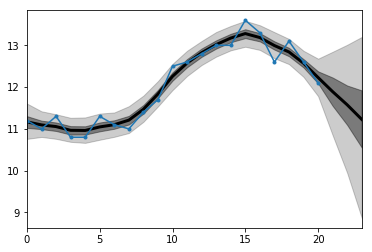

In [32]:
la = fit_nuts.extract()
mu = la["mu"]
mu_qua = np.percentile(mu,q=[2.5,25,50,75,97.5],axis=0)
pred = la["y_pred"]
pred_qua = np.percentile(pred,q=[2.5,25,50,75,97.5],axis=0)
plots = np.concatenate((mu_qua,pred_qua),axis=1)
T = np.arange(21)
T_all = np.arange(24)
fig, ax = plt.subplots(1,1)
ax.plot(T_all,plots[2,:],color="black",linewidth=3)
ax.fill_between(T_all,plots[1,:],plots[3,:],color="black", alpha=0.4)
ax.fill_between(T_all,plots[0,:],plots[4,:],color="black",alpha=0.2)
data.plot(marker=".")

# 12.2   
model12-6
\begin{equation}
\mu[t] \sim Normal(\mu[t-1],\sigma_\mu) \\
season[t] \sim Normal(-\sum_{l=1}^{L-1} season[t-l],\sigma_{season}) \\
Y[t] \sim Normal(\mu[t] + season[t], \sigma_Y)
\end{equation}

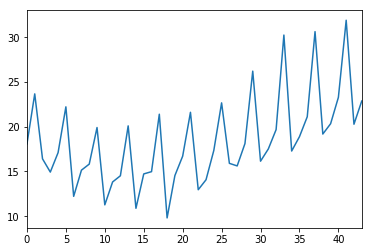

In [2]:
data = pd.read_csv("data-ss2.txt")
data = data["Y"]
data.plot()

In [3]:
d = {"Y":list(data.values), "T":data.shape[0]}

In [6]:
stan_code = """
data {
    int T;
    vector[T] Y;
}

parameters{
   vector[T] mu;
   vector[T] season;
   real<lower=0> s_mu;
   real<lower=0> s_season;
   real<lower=0> s_Y;
}

transformed parameters{
    vector[T] y_mean;
    y_mean = mu + season;
}

model{
    mu[2:T] ~ normal(mu[1:(T-1)], s_mu);
    for (t in 4:T)
        season[t] ~ normal(-sum(season[(t-3):(t-1)]), s_season);
    Y ~ normal(y_mean, s_Y);
}
"""

In [7]:
sm = pystan.StanModel(model_code=stan_code)
fit = sm.sampling(data=d, iter=1000, chains=4)
with open("output/model_and_result_12-6.pkl", "wb") as f:
    pickle.dump(sm, f)
    pickle.dump(fit, f)
with open('output/model_and_result_12-6.pkl', 'rb') as f:
    stanmodel = pickle.load(f)
    fit_nuts = pickle.load(f)

## summary
with open('output/fit-summary_12-6.txt', 'w') as f:
    f.write(str(fit_nuts))
    
palette = sns.color_palette()
ms = fit_nuts.extract(permuted=False, inc_warmup=True)
iter_from = fit_nuts.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_nuts.sim['fnames_oi']
num_pages = math.ceil(len(paraname)/4)


with PdfPages('output/fit-traceplot_12-6.pdf') as pdf:
    for pg in range(num_pages):
        plt.figure()
        for pos in range(4):
            pi = pg*4 + pos
            if pi >= len(paraname): break
            plt.subplot(4, 2, 2*pos+1)
            plt.tight_layout()
            [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
            plt.title(paraname[pi])
            plt.subplot(4, 2, 2*(pos+1))
            plt.tight_layout()
            [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
            plt.title(paraname[pi])
        pdf.savefig()
        plt.close()


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e161d20abf79c3fcd9efe2c31d58fdf1 NOW.
/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  """
/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  from ipykernel import kernelapp as app


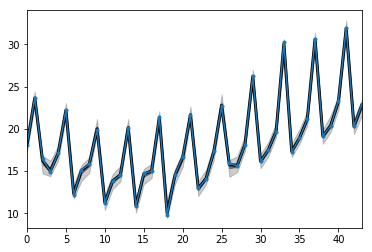

In [13]:
la = fit_nuts.extract()
mu = la["y_mean"]
mu_qua = np.percentile(mu,q=[2.5,25,50,75,97.5],axis=0)
T = np.arange(data.shape[0])
fig, ax = plt.subplots(1,1)
ax.plot(T,mu_qua[2,:],color="black",linewidth=3)
ax.fill_between(T,mu_qua[1,:],mu_qua[3,:],color="black", alpha=0.4)
ax.fill_between(T,mu_qua[0,:],mu_qua[4,:],color="black",alpha=0.2)
data.plot(marker=".")

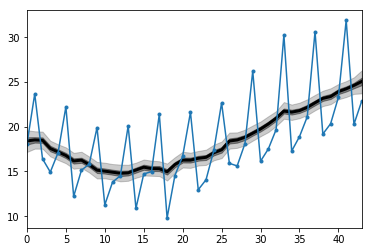

In [14]:
la = fit_nuts.extract()
mu = la["mu"]
mu_qua = np.percentile(mu,q=[2.5,25,50,75,97.5],axis=0)
T = np.arange(data.shape[0])
fig, ax = plt.subplots(1,1)
ax.plot(T,mu_qua[2,:],color="black",linewidth=3)
ax.fill_between(T,mu_qua[1,:],mu_qua[3,:],color="black", alpha=0.4)
ax.fill_between(T,mu_qua[0,:],mu_qua[4,:],color="black",alpha=0.2)
data.plot(marker=".")

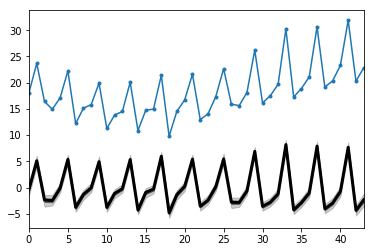

In [15]:
la = fit_nuts.extract()
mu = la["season"]
mu_qua = np.percentile(mu,q=[2.5,25,50,75,97.5],axis=0)
T = np.arange(data.shape[0])
fig, ax = plt.subplots(1,1)
ax.plot(T,mu_qua[2,:],color="black",linewidth=3)
ax.fill_between(T,mu_qua[1,:],mu_qua[3,:],color="black", alpha=0.4)
ax.fill_between(T,mu_qua[0,:],mu_qua[4,:],color="black",alpha=0.2)
data.plot(marker=".")

with predict

In [19]:
stan_code = """
data {
    int T;
    int T_pred;
    vector[T] Y;
}

parameters{
   vector[T] mu;
   vector[T] season;
   real<lower=0> s_mu;
   real<lower=0> s_season;
   real<lower=0> s_Y;
}

transformed parameters{
    vector[T] y_mean;
    y_mean = mu + season;
}

model{
    mu[2:T] ~ normal(mu[1:(T-1)], s_mu);
    for (t in 4:T)
        season[t] ~ normal(-sum(season[(t-3):(t-1)]), s_season);
    Y ~ normal(y_mean, s_Y);
}

generated quantities{
    vector[T+T_pred] mu_all;
    vector[T+T_pred] season_all;
    vector[T+T_pred] y_mean_all;
    vector[T_pred] y_pred;
    
    mu_all[1:T] = mu;
    season_all[1:T] = season;
    y_mean_all = mu_all + season_all;
    
    for (t in 1:T_pred) {
        mu_all[T+t] = normal_rng(mu_all[T+t-1], s_mu);
        season_all[T+t] = normal_rng(-sum(season_all[(T+t-3):(T+t-1)]), s_season);
        y_mean_all[T+t] = mu_all[T+t] + season_all[T+t] ;
        y_pred[t] = normal_rng(y_mean_all[T+t],s_Y);
    }
    
}

"""

In [20]:
d = {"Y":list(data.values), "T":data.shape[0], "T_pred":5}

In [21]:
sm = pystan.StanModel(model_code=stan_code)
fit = sm.sampling(data=d, iter=1000, chains=4)
with open("output/model_and_result_12-6p.pkl", "wb") as f:
    pickle.dump(sm, f)
    pickle.dump(fit, f)
with open('output/model_and_result_12-6p.pkl', 'rb') as f:
    stanmodel = pickle.load(f)
    fit_nuts = pickle.load(f)

## summary
with open('output/fit-summary_12-6p.txt', 'w') as f:
    f.write(str(fit_nuts))
    
palette = sns.color_palette()
ms = fit_nuts.extract(permuted=False, inc_warmup=True)
iter_from = fit_nuts.sim['warmup']
iter_range = np.arange(iter_from, ms.shape[0])
paraname = fit_nuts.sim['fnames_oi']
num_pages = math.ceil(len(paraname)/4)


with PdfPages('output/fit-traceplot_12-6p.pdf') as pdf:
    for pg in range(num_pages):
        plt.figure()
        for pos in range(4):
            pi = pg*4 + pos
            if pi >= len(paraname): break
            plt.subplot(4, 2, 2*pos+1)
            plt.tight_layout()
            [plt.plot(iter_range + 1, ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
            plt.title(paraname[pi])
            plt.subplot(4, 2, 2*(pos+1))
            plt.tight_layout()
            [sns.kdeplot(ms[iter_range,ci,pi], color=palette[ci]) for ci in range(ms.shape[1])]
            plt.title(paraname[pi])
        pdf.savefig()
        plt.close()

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d2e43486f693fc7f000c4fd58fdfe145 NOW.
/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  """
/home/watanabe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  from ipykernel import kernelapp as app


In [31]:
mu_qua.shape

(5, 49)

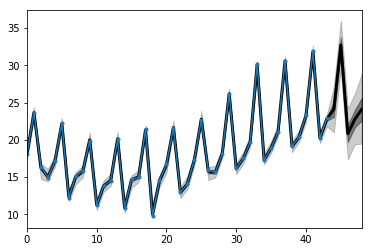

In [33]:
la = fit_nuts.extract()
mu = la["y_mean_all"]
mu_qua = np.percentile(mu,q=[2.5,25,50,75,97.5],axis=0)
T = np.arange(data.shape[0])
T_pred = 5
T_all =np.arange(data.shape[0]+T_pred)
fig, ax = plt.subplots(1,1)
ax.plot(T_all,mu_qua[2,:],color="black",linewidth=3)
ax.fill_between(T_all,mu_qua[1,:],mu_qua[3,:],color="black", alpha=0.4)
ax.fill_between(T_all,mu_qua[0,:],mu_qua[4,:],color="black",alpha=0.2)
data.plot(marker=".")

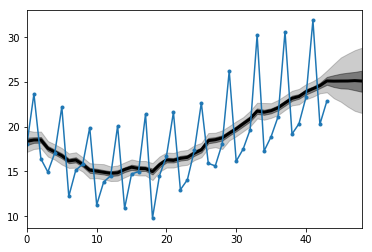

In [34]:
la = fit_nuts.extract()
mu = la["mu_all"]
mu_qua = np.percentile(mu,q=[2.5,25,50,75,97.5],axis=0)
T = np.arange(data.shape[0])
T_pred = 5
T_all =np.arange(data.shape[0]+T_pred)
fig, ax = plt.subplots(1,1)
ax.plot(T_all,mu_qua[2,:],color="black",linewidth=3)
ax.fill_between(T_all,mu_qua[1,:],mu_qua[3,:],color="black", alpha=0.4)
ax.fill_between(T_all,mu_qua[0,:],mu_qua[4,:],color="black",alpha=0.2)
data.plot(marker=".")

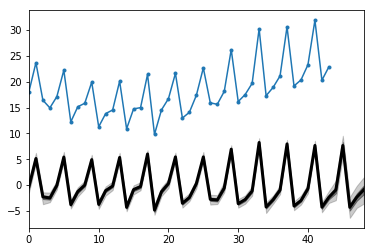

In [35]:
la = fit_nuts.extract()
mu = la["season_all"]
mu_qua = np.percentile(mu,q=[2.5,25,50,75,97.5],axis=0)
T = np.arange(data.shape[0])
T_pred = 5
T_all =np.arange(data.shape[0]+T_pred)
fig, ax = plt.subplots(1,1)
ax.plot(T_all,mu_qua[2,:],color="black",linewidth=3)
ax.fill_between(T_all,mu_qua[1,:],mu_qua[3,:],color="black", alpha=0.4)
ax.fill_between(T_all,mu_qua[0,:],mu_qua[4,:],color="black",alpha=0.2)
data.plot(marker=".")